# Proyecto de machine learning (Tópicos en IA 2022-02)

## Pasos para el proyecto
- Encuadre el problema y mire el panorama general.
- Obtener los datos.
- Explorar los datos para obtener perspectivas.
- Prepare los datos para exponer mejor los patrones de datos subyacentes a los algoritmos de aprendizaje automático.
- Explore muchos modelos diferentes y haga una lista corta de los mejores.
- Ajuste sus modelos y combínelos en una gran solución.
- Presente su solución.
- Lanze, monitoree y mantenga su sistema

# 1) Encuadre del problema y panorama general  
El el presente proyecto de inteligencia artificial se analizará el dataset `desercion.csv` que contiene información de alumnos que desertan o no de la universidad. El objetivo de este proyecto es crear un predictor basado en aprendizaje máquina para predecir si un alumno desertará o no de la universidad basándonos en datos concretos.  
Las soluciones que utilizaremos serán diferentes modelos de clasificación para esta tarea, la siguiente tarea hace uso de algoritmos supervisados. Para medir que tan acertado sea el modelo que utilizaremos, se aplicarán diferentes métricas de clasificación que se explicarán más adelante.

# 2) Obteniendo los datos

In [1]:
# ALgunas configuraciones preliminares
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "proyecto_parcial_I"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
import pandas as pd

def load_desercion_data(csv_path="./datasets/datos_desercion.csv"):
    return pd.read_csv(csv_path)

In [3]:
desercion = load_desercion_data()
desercion.head()

,cant_semestres,sexo,prom_notas_semestre,prom_inasistencias,cursos_reprobados,desercion
0,0,F,9.332000,8.800000,3,0
1,0,F,11.606000,14.600000,1,0
2,0,M,15.052500,11.375000,0,0
3,0,M,9.261666,17.666666,4,0
4,0,M,12.985000,8.666667,2,0


In [4]:
# no hay filas nulas
desercion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cant_semestres       4500 non-null   int64  
 1   sexo                 4500 non-null   object 
 2   prom_notas_semestre  4500 non-null   float64
 3   prom_inasistencias   4500 non-null   float64
 4   cursos_reprobados    4500 non-null   int64  
 5   desercion            4500 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 211.1+ KB


# 3) Explorando los datos para obtener perspectivas

In [5]:
# Esto nos indica que para la separación de los datos quizá debamos estratificar 
# los conjuntos manteniendo el porcentaje de sexos (estratificación)

print(desercion["sexo"].value_counts())
print(desercion["sexo"].value_counts(normalize=True))
# Hay un ~54% de mujeres y un ~46% de varones
print(desercion["desercion"].value_counts())

F    2440
M    2060
Name: sexo, dtype: int64
F    0.542222
M    0.457778
Name: sexo, dtype: float64
0    4320
1     180
Name: desercion, dtype: int64


In [6]:
desercion.describe()

,cant_semestres,prom_notas_semestre,prom_inasistencias,cursos_reprobados,desercion
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,0.069778,12.874364,9.654359,1.192000,0.040000
std,0.475702,2.023901,6.088824,1.272943,0.195981
min,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.000000,11.878429,5.166667,0.000000,0.000000
50%,0.000000,13.060000,9.000000,1.000000,0.000000
75%,0.000000,14.174881,13.285714,2.000000,0.000000
max,5.000000,18.372858,53.000000,8.000000,1.000000


Saving figure attribute_histogram_plots


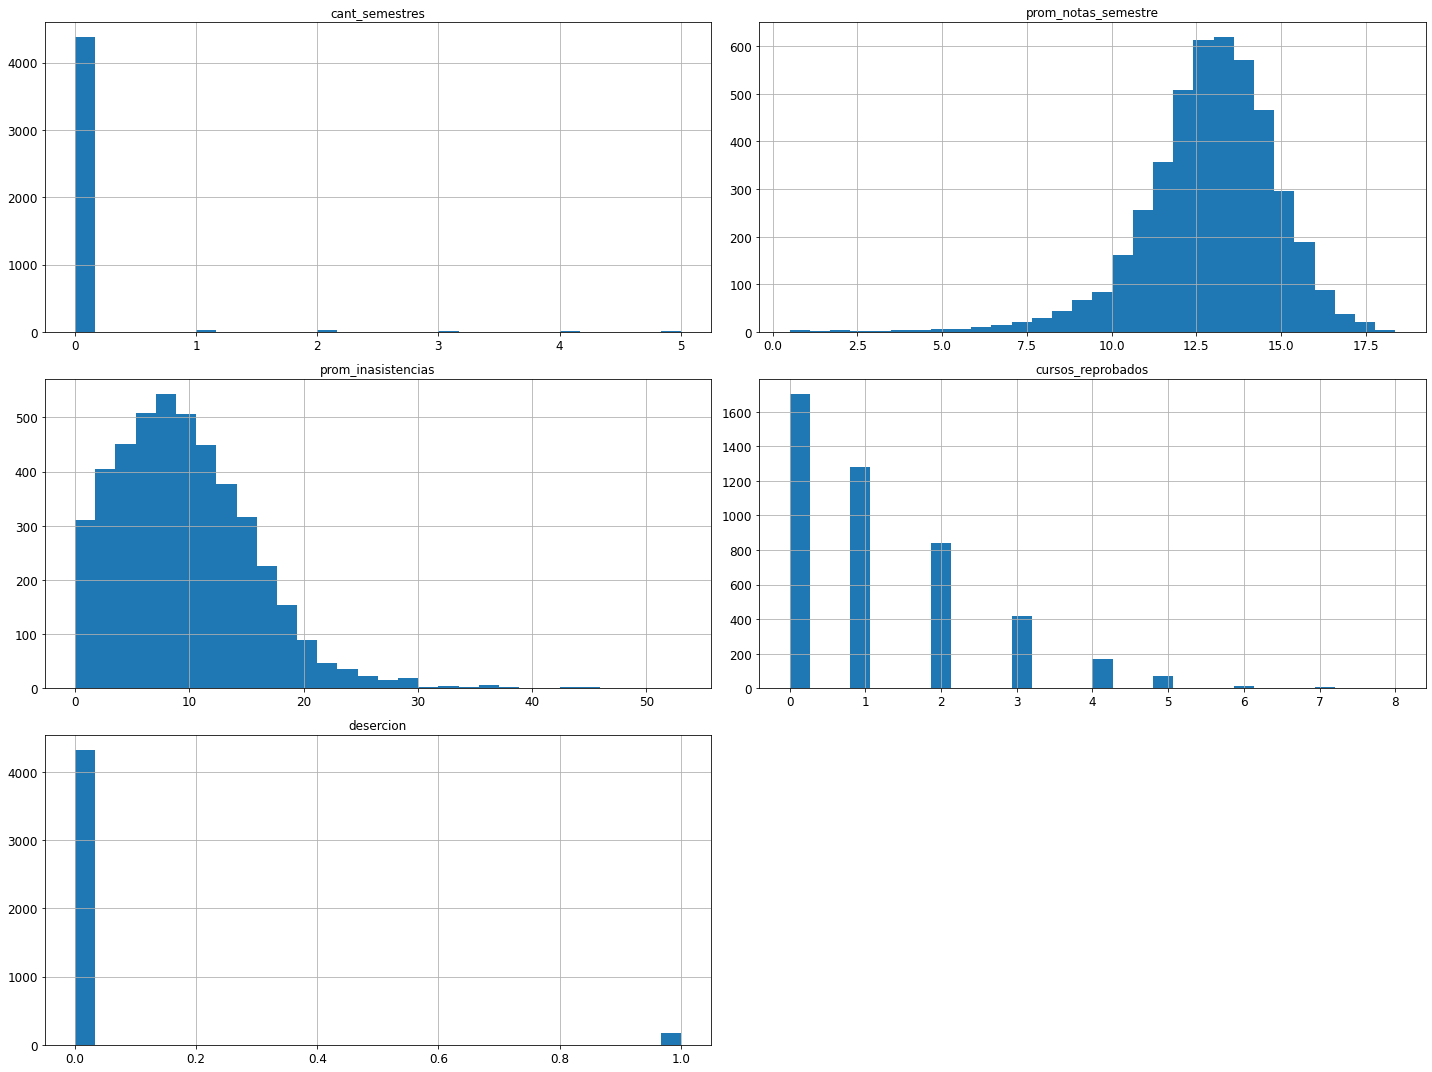

In [7]:
# graficamos histogramas por cada variable
%matplotlib inline
import matplotlib.pyplot as plt
desercion.hist(bins=30, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [8]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [9]:
# separar los datos de entrenamiento y de prueba aleatoriamente
from sklearn.model_selection import train_test_split

# El tamaño del conjunto de prueba es el 30%
train_set, test_set = train_test_split(desercion, test_size=0.3, random_state=42)
test_set.head()

,cant_semestres,sexo,prom_notas_semestre,prom_inasistencias,cursos_reprobados,desercion
2323,0,M,14.24800,9.600000,0,0
3686,0,M,12.79125,3.250000,0,0
2974,0,F,13.18000,4.571429,2,0
2992,0,F,15.40250,9.000000,0,0
468,0,M,12.14375,9.375000,3,0


In [10]:
# Separaremos los datos estratificadamente por la variable desercion, ya que necesitamos
# que esta variable tenga la misma proporción tanto en el conjunto de prueba como en el de entrenamiento
desercion["desercion"].value_counts()

0    4320
1     180
Name: desercion, dtype: int64

<AxesSubplot:>

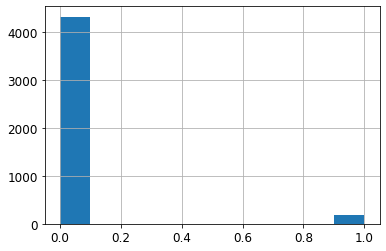

In [11]:
desercion["desercion"].hist()

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(desercion, desercion["desercion"]):
    strat_train_set = desercion.loc[train_index]
    strat_test_set = desercion.loc[test_index]

In [13]:
# porcentaje de los alumnos que han desertado (conjunto de prueba estratificada)
strat_test_set["desercion"].value_counts() / len(strat_test_set)

0    0.96
1    0.04
Name: desercion, dtype: float64

In [14]:
# porcentaje de los alumnos que han desertado (conjunto general)
desercion["desercion"].value_counts() / len(desercion)

0    0.96
1    0.04
Name: desercion, dtype: float64

In [15]:
# verificaremos el error de separar el conjunto de datos estratificadamente y aleatoriamente
def desercion_proportions(data):
    return data["desercion"].value_counts() / len(data)

train_set, test_set = train_test_split(desercion, test_size=0.3, random_state=42)

compare_props = pd.DataFrame({
    "Overall": desercion_proportions(desercion),
    "Stratified": desercion_proportions(strat_test_set),
    "Random": desercion_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [16]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
0,0.96,0.96,0.957778,-0.231481,0.0
1,0.04,0.04,0.042222,5.555556,0.0


In [17]:
desercion = strat_train_set.copy()

In [18]:
corr_matrix = desercion.corr()

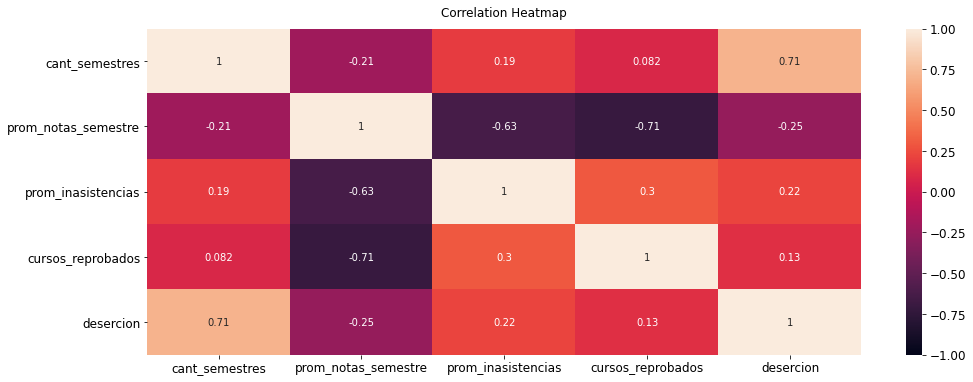

In [19]:
import seaborn as sns
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
# Título del mapa de calor.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

En la matriz de correlación vemos que la variable que más influye en la desercion es la cantidad de semestres

Saving figure scatter_matrix_plot


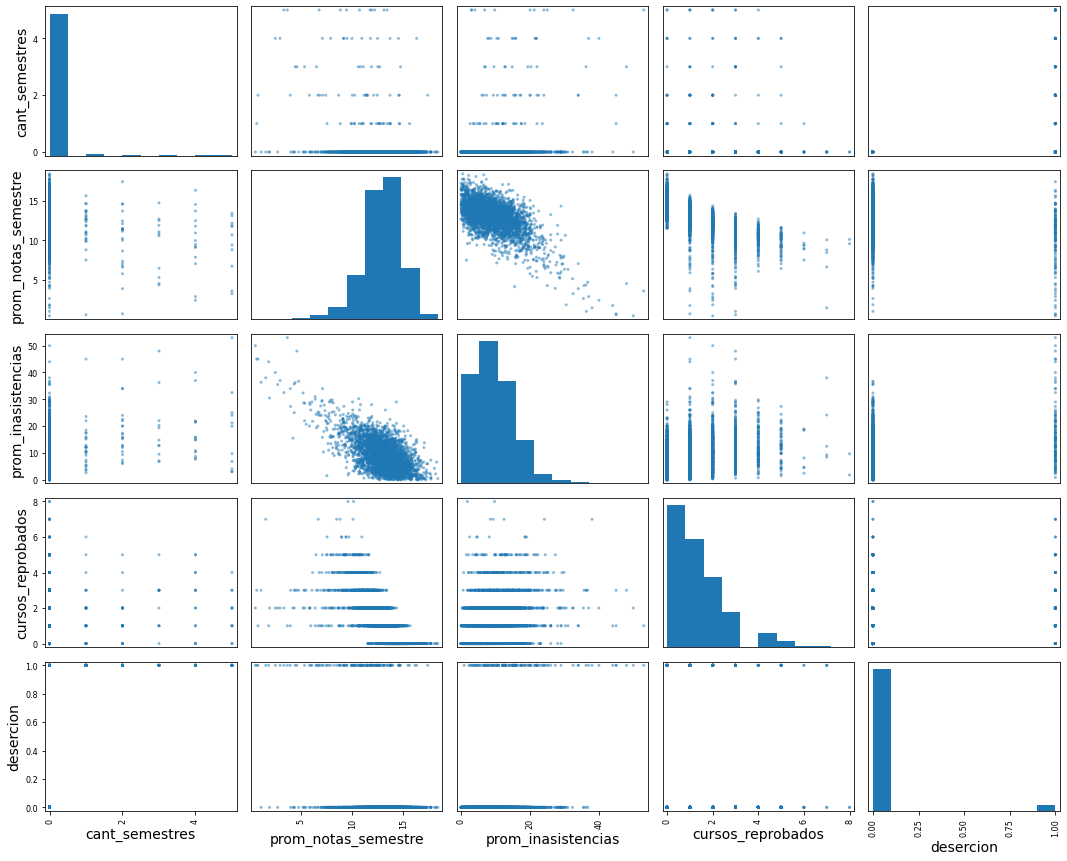

In [20]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["cant_semestres", "prom_notas_semestre", "prom_inasistencias",
              "cursos_reprobados", "desercion"]
scatter_matrix(desercion[attributes], figsize=(15, 12))
save_fig("scatter_matrix_plot")

In [21]:
corr_matrix = desercion.corr()
corr_matrix["desercion"].sort_values(ascending=False)

desercion              1.000000
cant_semestres         0.705445
prom_inasistencias     0.223814
cursos_reprobados      0.126333
prom_notas_semestre   -0.253827
Name: desercion, dtype: float64

Saving figure cant_semestres_vs_desercion_scatterplot


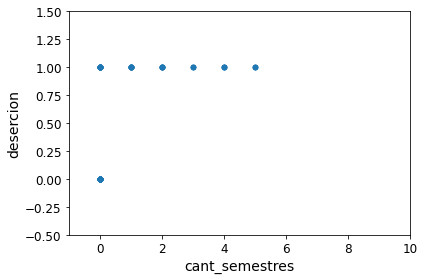

In [22]:
# esto quiere decir que más alumnos desertan a medida que avanzan en los semestres
desercion.plot(kind="scatter", x="cant_semestres", y="desercion",
             alpha=0.5)
plt.axis([-1, 10, -0.5, 1.5])
save_fig("cant_semestres_vs_desercion_scatterplot")

In [23]:
desercion.describe()

,cant_semestres,prom_notas_semestre,prom_inasistencias,cursos_reprobados,desercion
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.00000
mean,0.067619,12.870320,9.598025,1.199683,0.04000
std,0.469656,2.027885,6.134128,1.280506,0.19599
min,0.000000,0.500000,0.000000,0.000000,0.00000
25%,0.000000,11.880000,5.000000,0.000000,0.00000
50%,0.000000,13.038286,9.000000,1.000000,0.00000
75%,0.000000,14.179167,13.285714,2.000000,0.00000
max,5.000000,18.372858,53.000000,8.000000,1.00000


# 4) Prepare los datos para los algoritmos de aprendizaje automático

In [24]:
desercion = strat_train_set.drop("desercion", axis=1) # eliminando la etiqueta desercion para el conjunto de entrenamiento
desercion_labels = strat_train_set["desercion"].copy()

In [25]:
sample_incomplete_rows = desercion[desercion.isnull().any(axis=1)].head()
sample_incomplete_rows

,cant_semestres,sexo,prom_notas_semestre,prom_inasistencias,cursos_reprobados


Para seguir con la modificación del conjunto de entrenamiento quitaremos aquellas variables textuales para trabajar solo con números

In [26]:
desercion_num = desercion.drop('sexo', axis=1) # la columna sexo es una variable categórica en texto

no hay datos nulos en el conjunto de datos, entonces no se necesita rellenar los datos con ninguna técnica

desercion     0   1
sexo               
F          1638  65
M          1386  61


<AxesSubplot:xlabel='sexo'>

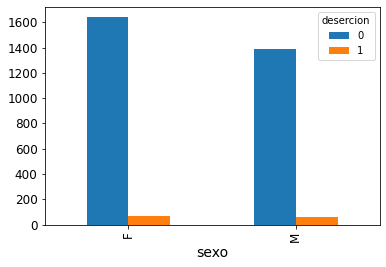

In [27]:
# Más adelante analizaremos si el sexo influye o no en el resultado de la clasificación
desercion_cat = desercion[["sexo"]]
#################################################
# Cross tabulation entre el SEXO y la DESERCION
CrosstabResult=pd.crosstab(index=desercion['sexo'],columns=desercion_labels)
print(CrosstabResult)
 
# Agrupamos estas barras para mostrar la relación entre DESERCION y el SEXO
%matplotlib inline
CrosstabResult.plot.bar()

In [28]:
desercion_cat = desercion['sexo']
desercion_cat.head(10)

1477    F
1849    M
4347    F
1994    F
510     M
3346    M
959     F
3442    M
1480    M
1094    M
Name: sexo, dtype: object

Podemos usar el método factorize() de Pandas para convertir estas letras categóricas ("M","F") a un número de característica categórica, la cual será más fácil de interpretar para los algoritmos de _Machine Learning_:

In [29]:
desercion_cat_encoded, desercion_categories = desercion_cat.factorize()
desercion_cat_encoded[:10]

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [30]:
desercion_categories

Index(['F', 'M'], dtype='object')

Otro método existente es la codificación _One Hot_ la cual generará vectores binarios asignando una posición específica para cada categoría, p.ej. Supongamos que tenemos las siguientes categorías:  
[0 1 2 4]  
[1 0 0 0] -> 0 (este vector representa a la categoría 0)  
[0 1 0 0] -> 1 (este vector representa a la categoría 1)  
[0 0 1 0] -> 2 (este vector representa a la categoría 2)  
[0 0 0 1] -> 4 (este vector representa a la categoría 4)

In [31]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
desercion_cat_1hot = encoder.fit_transform(desercion_cat_encoded.reshape(-1,1))
desercion_cat_1hot

<3150x2 sparse matrix of type '<class 'numpy.float64'>'
	with 3150 stored elements in Compressed Sparse Row format>

In [32]:
desercion_cat_1hot.toarray()

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [33]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

La clase `CategoricalEncoder` expera un array 2D que contenga una o más variables categóricas. Necesitamos hacer un _reshape_ `desercion_cat` a un array 2D.

In [34]:
#from sklearn.preprocessing import CategoricalEncoder # in future versions of Scikit-Learn
cat_encoder = CategoricalEncoder()
desercion_cat_reshaped = desercion_cat.values.reshape(-1, 1)
desercion_cat_1hot = cat_encoder.fit_transform(desercion_cat_reshaped)
desercion_cat_1hot

<3150x2 sparse matrix of type '<class 'numpy.float64'>'
	with 3150 stored elements in Compressed Sparse Row format>

La codificación por defecto es _one-hot_, y esto retorna una matriz/arreglo esparsa. Puedes usar el método `toarray()` para obtener un arreglo denso:

In [35]:
desercion_cat_1hot.toarray()

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

Ahora utilizaremos pipelines para trabajar los valores numéricos del conjunto de entrenamiento

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

desercion_num_tr = num_pipeline.fit_transform(desercion_num)

In [37]:
desercion_num_tr

array([[-0.14399845, -0.31933044,  0.64785635,  0.62510029],
       [-0.14399845,  0.686099  , -0.63323688, -0.93703053],
       [-0.14399845, -0.53939308, -0.28772989,  0.62510029],
       ...,
       [-0.14399845,  0.31690136, -1.51835591,  0.62510029],
       [-0.14399845,  0.7749928 , -0.34207933, -0.93703053],
       [-0.14399845,  0.56949141, -1.26601934, -0.93703053]])

Creamos un transformador que seleccionará un subconjunto de columnas del Dataframe

In [38]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Uniremos todos los componentes del pipeline en un gran pipelinepara preprocesar tanto las variables categóricas como las numéricas

In [39]:
num_attribs = list(desercion_num) # El nombre de los atributos numéricos: 
#['cant_semestres','prom_notas_semestre','prom_inasistencias','cursos_reprobados']
cat_attribs = ["sexo"] # El nombre de la variable categórica: ["sexo"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)), # selecciona los atributos/variables numéric@s
        ('std_scaler', StandardScaler()), # Regulariza los datos con la desviación estándar 
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)), # selecciona los atributos categóricos
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")), # codificará la variable categórica en un array denso
    ])

In [40]:
from sklearn.pipeline import FeatureUnion

# Combinamos ambos pipelines en uno más grande
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [41]:
desercion_prepared = full_pipeline.fit_transform(desercion)
desercion_prepared

array([[-0.14399845, -0.31933044,  0.64785635,  0.62510029,  1.        ,
         0.        ],
       [-0.14399845,  0.686099  , -0.63323688, -0.93703053,  0.        ,
         1.        ],
       [-0.14399845, -0.53939308, -0.28772989,  0.62510029,  1.        ,
         0.        ],
       ...,
       [-0.14399845,  0.31690136, -1.51835591,  0.62510029,  1.        ,
         0.        ],
       [-0.14399845,  0.7749928 , -0.34207933, -0.93703053,  1.        ,
         0.        ],
       [-0.14399845,  0.56949141, -1.26601934, -0.93703053,  1.        ,
         0.        ]])

In [42]:
# Ya tenemos lista la data convertida
desercion_prepared.shape

(3150, 6)

# 5) Selección de modelos de _machine learning_  
Los modelos de clasificación que utilizaremos son:  
- _Naive Bayes_.
- _Decision Tree_.
- _Random Forest_.
- _Support Vector Machine_.
- _Logistic Regression_ (implementación propia).

## _Cross Validation_  
Utilizaremos la validación cruzada para cada conjunto de datos, nuestra variable _k_ será 5.

In [43]:
from sklearn.model_selection import cross_val_score

def display_scores(scores, name):
    print(f"Showing scores of metric {name}")
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

def get_k_fold_prediction_metrics(model, X_train, y_train, k_folds=5):
    scores_f1 = cross_val_score(model, X_train, y_train, scoring="f1", cv=k_folds)
    scores_precision = cross_val_score(model, X_train, y_train, scoring="precision", cv=k_folds)
    scores_recall = cross_val_score(model, X_train, y_train, scoring="recall", cv=k_folds)
    display_scores(scores_f1, "'F1'")
    display_scores(scores_precision, "'Precision'")
    display_scores(scores_recall, "'Recall'")


In [44]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
print("Metrics for Naive Bayes classifier")
get_k_fold_prediction_metrics(gnb, desercion_prepared, desercion_labels)

Metrics for Naive Bayes classifier
Showing scores of metric 'F1'
Scores: [0.80952381 0.73170732 0.79069767 0.84444444 0.80851064]
Mean: 0.7969767767515804
Standard deviation: 0.03699504551308491
Showing scores of metric 'Precision'
Scores: [1.         0.9375     0.94444444 0.95       0.9047619 ]
Mean: 0.94734126984127
Standard deviation: 0.03065372808653829
Showing scores of metric 'Recall'
Scores: [0.68       0.6        0.68       0.76       0.73076923]
Mean: 0.6901538461538461
Standard deviation: 0.054519742909004125


In [45]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
print("Metrics for Decision Tree classifier")
get_k_fold_prediction_metrics(tree_reg, desercion_prepared, desercion_labels)

Metrics for Decision Tree classifier
Showing scores of metric 'F1'
Scores: [0.6        0.67857143 0.65116279 0.71875    0.72340426]
Mean: 0.6743776949176505
Standard deviation: 0.04574071657568884
Showing scores of metric 'Precision'
Scores: [0.55555556 0.79166667 0.56       0.6969697  0.68      ]
Mean: 0.6568383838383839
Standard deviation: 0.08939970077878784
Showing scores of metric 'Recall'
Scores: [0.65217391 0.59375    0.77777778 0.74193548 0.77272727]
Mean: 0.7076728894838993
Standard deviation: 0.07263505303956322


In [46]:
from sklearn.ensemble import RandomForestClassifier

forest_classifier = RandomForestClassifier(n_estimators=20, random_state=42)
print("Metrics for Random Forest classifier")
get_k_fold_prediction_metrics(forest_classifier, desercion_prepared, desercion_labels)

Metrics for Random Forest classifier
Showing scores of metric 'F1'
Scores: [0.73170732 0.75       0.77272727 0.84444444 0.86956522]
Mean: 0.7936888503272383
Standard deviation: 0.0538946514154267
Showing scores of metric 'Precision'
Scores: [0.9375     1.         0.89473684 0.95       1.        ]
Mean: 0.9564473684210526
Standard deviation: 0.04000605909787837
Showing scores of metric 'Recall'
Scores: [0.6        0.6        0.68       0.76       0.76923077]
Mean: 0.6818461538461538
Standard deviation: 0.0736818685395484


In [47]:
from sklearn.svm import SVC

svc_classifier = SVC(kernel="linear")
print("Metrics for Support Vector Machine classifier")
get_k_fold_prediction_metrics(svc_classifier, desercion_prepared, desercion_labels)

Metrics for Support Vector Machine classifier
Showing scores of metric 'F1'
Scores: [0.75       0.75       0.80952381 0.86363636 0.81818182]
Mean: 0.7982683982683982
Standard deviation: 0.04348764425516193
Showing scores of metric 'Precision'
Scores: [1. 1. 1. 1. 1.]
Mean: 1.0
Standard deviation: 0.0
Showing scores of metric 'Recall'
Scores: [0.6        0.6        0.68       0.76       0.69230769]
Mean: 0.6664615384615384
Standard deviation: 0.06072072065744744


## Regresión Logística (implementación propia)
Las funciones principales a implementar son:  
### Función de costo  
$$
J(\theta)=-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}\log(h_{\theta}(x^{(i)})) + (1-y^{(i)})\log(1-h_{\theta}(x^{(i)}))
$$
### Gradiente descendiente  
$$
\theta_{j} := \theta_{j} - \frac{\alpha}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x_{j}^{(i)}
$$
La ecuación de arriba también puede ser expresada como una ecuación del algebra lineal.  
$$
\theta := \theta - \frac{\alpha}{m} X^{T}(\sigma(X\theta) - y)
$$

In [48]:
def add_bias(X):
    """
    Función [add_bias]: añade una columna de 1s como primera columna del conjunto de datos X
    Entradas:
    - X: El conjunto de datos, array de dimensión (N,M)
    Salidas:
    - X_bias: El conjunto de datos con un bias, array de dimensión (N,M+1)
    
    """  
    # agregamos una columna de unos (bias) como primera columna del conjunto de datos
    rows_X = X.shape[0]
    ones = np.ones((rows_X, 1))
    X_bias = np.append(ones, X, axis=1)
    return X_bias

def sigmoid(x):
    """
    Función [sigmoid]: retorna el valor de la función sigmoidal de x
    Entradas:
    - x: número real o entero
    Salidas:
    - sigmoidal(x): valor de la función sigmoidal en x
    """
    return 1 / (1 + np.exp(-x))

# La vectorización de la función sigmoidal
vec_sigmoid = np.vectorize(sigmoid)

In [55]:
def logistic_cost(X, y, theta):
    """
    Función [logistic_cost]: Calcula la función de costo de la regresión logística
    Entradas:
    - X: El conjunto de datos (es obligatorio que tenga un vector bias asociado)
         array de dimensión (N,M)
    - y: El vector de predicción del conjunto de datos, array de dimensión (N,) o (N,1)
    - theta: El vector de pesos de la regresión logística, array de dimensión (M,) o (M,1)
    Salidas:
    - J(theta): la función de costo de la regresión logística
    """
    if X.shape[1] != theta.shape[0]:
        print("Err: el número de columnas de 'X' debe coincidir con el de filas de 'theta'")
        # retornamos -1 para indicar error
        return -1
    
    y_copy = y.copy()
    theta_copy = theta.copy()
    if y.ndim != 2:
        y_copy = y_copy.reshape((y.shape[0], 1))    
    if theta.ndim != 2:
        theta_copy = theta_copy.reshape((theta.shape[0], 1))
  
    m = y.shape[0]
    # usamos la vectorización de la función sigmoidal
    h_theta = vec_sigmoid(X @ theta_copy)
    J = (y_copy * np.log(h_theta)) + ((1 - y_copy) * np.log(1 - h_theta))
    J = -1 / m * J
    return J.sum() # retornamos la suma de todos los elementos del vector de costo


def logistic_gradient_descent_step(X, y, theta, alpha):
    """
    Función [logistic_gradient_descent_step]: Ejecuta el paso del gradiente descendiente para la regresión logística
    Entradas:
    - X: El conjunto de datos (es obligatorio que tenga un vector bias asociado)
         array de dimensión (N,M).
    - y: El vector de predicción del conjunto de datos, array de dimensión (N,) o (N,1).
    - theta: El vector de pesos de la regresión logística, array de dimensión (M,) o (M,1).
    - alpha: El hiperparámetro (escalar) usado para escalar el vector gradiente.
    Salidas:
    - new_theta: El nuevo valor del vector de pesos theta.
    """
    y_copy = y.copy()
    theta_copy = theta.copy()
    if y.ndim != 2:
        y_copy = y_copy.reshape((y.shape[0], 1))    
    if theta.ndim != 2:
        theta_copy = theta_copy.reshape((theta.shape[0], 1))
    m = y.shape[0]
    h_theta = vec_sigmoid(X @ theta_copy)
    new_theta = theta_copy - (alpha / m) * (X.T @ (h_theta - y))
    return new_theta

def predict(y, thr= 0.5):
    """
    Función [predict]: Esta función obtiene el vector de predicción basándonos en un valor umbral, los valores predecidos
                       se encuentran en el conjunto {0,1}.
    Entradas:
    - y: El vector sobre el cual se hará la predicción binaria, array de dimensión (N,).
    - thr: El umbral (threshold) para considerar como 1 o 0 la predicción del regresor logístico (0.5 por defecto)
           p.ej. si thr=0.5 y P(X[i])=0.99, entonces como P(X[i]) >= thr, entonces Pred(P(X[i]))=1
           si P(X[i])=0.23, entonces Pred(P(X[i]))=0.
    Salidas:
    - y_pred: El vector con los valores binarios predecidos, array de dimensión (N,).
    """
    return (y >= thr).astype("int32").reshape(-1)  

def logistic_regressor(X, y, alpha, it=100, thr= 0.5):
    """
    Función [logistic_regressor]: Ejecuta la regresión logística sobre un conjunto de datos dado un hiperparámetro
                                  y una cantidad determindad de iteraciones
    Entradas:
    - X: El conjunto de datos (es obligatorio que tenga un vector bias asociado) array de dimensión (N,M),
         donde M es la cantidad de variables a analizar.
    - y: El vector de predicción del conjunto de datos, array de dimensión (N,).
    - alpha: El hiperparámetro (escalar) usado para escalar el vector gradiente.
    - it: Cantidad de iteraciones (100 por defecto).
    - thr: El umbral (threshold) para considerar como 1 o 0 la predicción del regresor logístico (0.5 por defecto)
           p.ej. si thr=0.5 y P(X[i])=0.99, entonces como P(X[i]) >= thr, entonces Pred(P(X[i]))=1
           si P(X[i])=0.23, entonces Pred(P(X[i]))=0
    Salidas:
    - theta: El vector con los pesos entrenados, array de dimensión (M+1,). 
    - y_pred: Array de dimensión (M,) con las predicciones del regresor logístico basado en el threshold.
    - error: Lista de tamaño "it" con los valores de la función de costo por cada iteración.
    """

    # primero cambiamos la dimensión de y para que sea un vector columna
    y_ = y.reshape((y.shape[0], 1))
    # lo que realizaremos en este paso es agregar una columna de 1s que será el bias de nuestro
    # modelo
    X_bias = add_bias(X)
    # inicializamos el vector theta (vector columna) todos 1, sumamos 1 ya que se necesita
    # el bias
    theta = np.ones((X.shape[1]+1, 1)) 


    errors = []
    for i in range(it):
        # Primero calculamos el costo en cada iteración
        errors.append(logistic_cost(X_bias, y_, theta))
        # luego actualizamos el vector theta
        theta = logistic_gradient_descent_step(X_bias, y_, theta, alpha)
        
    pred = predict(vec_sigmoid(X_bias @ theta), thr)
    theta = theta.reshape(theta.shape[0])
    
    # theta = [0_0, 0_1, 0_2, ..., 0_n] ("0" repreenta el simbolo theta)
    # errors = [e_0, e_1, e_2, ..., e_it] ("e_i" error en la iteración i)
    return theta, pred, errors 

In [56]:
# Ahora aplicaremos la regresión logística
it = 200
alpha = 0.05
theta, y_pred, costs = logistic_regressor(desercion_prepared, desercion_labels.to_numpy(), alpha, it, 0.5)
print("Thetas: ", theta) # el vector de pesos
print("Costos: ", costs[-5:]) # los últimos 5 costos

Thetas:  [-1.76274668  1.44204799  0.86258406  0.61938517  0.64680413 -0.46499228
 -0.2977544 ]
Costos:  [0.13731409152574936, 0.13677969418174443, 0.13625223246068469, 0.13573158118557438, 0.13521761802849291]


In [57]:
# mostrando unas predicciones
print("y: ", desercion_labels.to_numpy()[:100])
print("y_pred: ", y_pred[:100])

y:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
y_pred:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [58]:
from sklearn.metrics import confusion_matrix

# sacando la matriz de confusión
confusion_matrix(desercion_labels.to_numpy(), y_pred)

array([[3023,    1],
       [  44,   82]], dtype=int64)

In [59]:
# Ahora aplicare mi implementación con k-folds cross validation
# utilizaremos una separación estratificada ya que nuestro conjunto de datos no es balanceada
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

skf = StratifiedKFold(n_splits=5) # 5 k-folds
print("Particiones (k-fold): ", skf.get_n_splits(desercion_prepared, desercion_labels))

f1_list = []
precision_list = []
recall_list = []
for train_index, test_index in skf.split(desercion_prepared, desercion_labels):
    X_train, X_test = desercion_prepared[train_index], desercion_prepared[test_index]
    y_train, y_test = desercion_labels.to_numpy()[train_index], desercion_labels.to_numpy()[test_index]
    theta, _, _ = logistic_regressor(X_train, y_train, 0.05, 200, 0.5)
    # y_pred es el vector de predicción de nuestros datos
    y_pred = predict((vec_sigmoid(add_bias(X_test) @ theta.reshape((theta.shape[0], 1)))).reshape(-1))
    f1_list.append(f1_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred))
    
print("Metrics for logistic regressor (own implementation)")
display_scores(np.array(f1_list), "F1")
display_scores(np.array(precision_list), "Precision")
display_scores(np.array(recall_list), "Recall")

Particiones (k-fold):  5
Metrics for logistic regressor (own implementation)
Showing scores of metric F1
Scores: [0.75       0.68421053 0.75       0.84444444 0.81818182]
Mean: 0.7693673577884104
Standard deviation: 0.05660617550430727
Showing scores of metric Precision
Scores: [1.   1.   1.   0.95 1.  ]
Mean: 0.99
Standard deviation: 0.020000000000000018
Showing scores of metric Recall
Scores: [0.6        0.52       0.6        0.76       0.69230769]
Mean: 0.6344615384615386
Standard deviation: 0.08316576446289799


In [60]:
# Comparando con la implementación de (Scikit Learn)
from sklearn.linear_model import LogisticRegression
logistic_reg=LogisticRegression(random_state=42, max_iter=200)
print("Metrics for Logistic Regression classifier (scikit learn implementation)")
get_k_fold_prediction_metrics(logistic_reg, desercion_prepared, desercion_labels)

Metrics for Logistic Regression classifier (scikit learn implementation)
Showing scores of metric 'F1'
Scores: [0.80952381 0.75       0.79069767 0.86363636 0.81818182]
Mean: 0.8064079331521192
Standard deviation: 0.037019166554405715
Showing scores of metric 'Precision'
Scores: [1.         1.         0.94444444 1.         1.        ]
Mean: 0.9888888888888889
Standard deviation: 0.022222222222222233
Showing scores of metric 'Recall'
Scores: [0.68       0.6        0.68       0.76       0.69230769]
Mean: 0.6824615384615385
Standard deviation: 0.05083538813061757


El modelo que mejor resultado dió en la medida F1 fué _Support Vector Machine_ por lo que haremos el _fine tunning_ sobre ese modelo.

# 6) Ajuste del modelo (_fine tunning_)

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]


svc_classifier = SVC()
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(svc_classifier, param_grid, cv=5,
                           scoring='f1', return_train_score=True)
grid_search.fit(desercion_prepared, desercion_labels)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='f1')

In [62]:
grid_search.best_params_ # imprimimos los mejores parámetros de la búsqueda

{'C': 1, 'kernel': 'linear'}

In [63]:
grid_search.best_estimator_

SVC(C=1, kernel='linear')

Observemos los punajes en cada combinación de hiperparámetro probada durante la búsqueda en _grid_:

In [64]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'C': 1, 'kernel': 'linear'}
nan {'C': 10, 'kernel': 'linear'}
nan {'C': 100, 'kernel': 'linear'}
nan {'C': 1000, 'kernel': 'linear'}
nan {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
-0.0 {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
nan {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
nan {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
nan {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
nan {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
nan {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
nan {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


<ipython-input-64-4ec637f9de24>:3: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(-mean_score), params)


In [65]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006592,0.001358,0.002801,0.000751,1,linear,NaN,"{'C': 1, 'kernel': 'linear'}",0.750000,0.750000,...,0.798268,0.043488,1,0.811765,0.811765,0.797619,0.783133,0.795181,0.799892,0.010864
1,0.019586,0.004073,0.002202,0.000399,10,linear,NaN,"{'C': 10, 'kernel': 'linear'}",0.750000,0.750000,...,0.798268,0.043488,1,0.811765,0.811765,0.797619,0.783133,0.795181,0.799892,0.010864
2,10.437060,11.787684,0.002000,0.000002,100,linear,NaN,"{'C': 100, 'kernel': 'linear'}",0.750000,0.750000,...,0.798268,0.043488,1,0.811765,0.811765,0.797619,0.783133,0.795181,0.799892,0.010864
3,75.891885,15.252101,0.001799,0.000402,1000,linear,NaN,"{'C': 1000, 'kernel': 'linear'}",0.750000,0.750000,...,0.798268,0.043488,1,0.811765,0.811765,0.797619,0.783133,0.795181,0.799892,0.010864
4,0.014798,0.001168,0.003994,0.000623,1,rbf,0.001,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.529412,0.571429,...,0.617787,0.079972,10,0.644295,0.635135,0.635135,0.587413,0.611111,0.622618,0.020761
5,0.016194,0.000769,0.004006,0.000014,1,rbf,0.0001,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.000000,0.000000,...,0.000000,0.000000,12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.030794,0.005997,0.007200,0.004444,10,rbf,0.001,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",0.750000,0.750000,...,0.798268,0.043488,1,0.811765,0.811765,0.797619,0.783133,0.795181,0.799892,0.010864
7,0.014984,0.001091,0.003194,0.000388,10,rbf,0.0001,"{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}",0.529412,0.571429,...,0.617787,0.079972,10,0.644295,0.635135,0.635135,0.587413,0.611111,0.622618,0.020761
8,0.111194,0.032692,0.005987,0.001673,100,rbf,0.001,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",0.750000,0.750000,...,0.798268,0.043488,1,0.811765,0.811765,0.797619,0.783133,0.795181,0.799892,0.010864
9,0.034998,0.002595,0.004401,0.000474,100,rbf,0.0001,"{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}",0.750000,0.750000,...,0.798268,0.043488,1,0.811765,0.811765,0.797619,0.783133,0.795181,0.799892,0.010864


# 7) Presentación de la solución

In [66]:
# predicción final con el score F1
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("desercion", axis=1)
y_test = strat_test_set["desercion"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_f1 = f1_score(y_test, final_predictions)
final_f1

0.8387096774193548